In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator
from qiskit_algorithms.gradients import ParamShiftEstimatorGradient

from algo.utils import (
    xxz_hamiltonian, 
    circuit_QAOA_XXZ,
    expectation_loss_grad
)

cite: Exploring Entanglement and Optimization within the Hamiltonian Variational
Ansatz

## $X X Z$ model

Another prototypical model for studying quantum magnetism is the XXZ model. For the 1D XXZ model, the Hamiltonian is given by

$$
\begin{aligned}
H_{\mathrm{XXZ}} & =\sum_{i=1}^N\left[\sigma_i^x \sigma_{i+1}^x+\sigma_i^y \sigma_{i+1}^y+\Delta \sigma_i^z \sigma_{i+1}^z\right] \\
& =H_{x x}+H_{y y}+\Delta H_{z z},
\end{aligned}
$$

with $H_{x x}=\sum_{i=1}^N \sigma_i^x \sigma_{i+1}^x, H_{y y}=\sum_{i=1}^N \sigma_i^y \sigma_{i+1}^y$ and $H_{z z}=$ $\sum_{i=1}^N \sigma_i^z \sigma_{i+1}^z$. Again, we assume periodic boundary conditions. The parameter $\Delta$ controls the spin anisotropy in the model. For $\Delta=1$, this model has an $S U(2)$ symmetry and is equivalent to the Heisenberg chain. For $\Delta \neq 1$, this symmetry gets reduced to a $U(1) \times \mathbb{Z}_2$ symmetry. For $1<|\Delta|$, the system is in the XY quasi-long-range ordered state and becomes gapless in the thermodynamic limit. At $|\Delta|=1$, there is a phase transition to the Néel ordered state. This model can be solved exactly using the Bethe ansatz for $N \rightarrow \infty[24]$.


In this work, we consider the problem of approximating the ground state at the critical points $g=1$ and $\Delta=1$ for the TFIM and the XXZ model, respectively, since their particular entanglement scaling properties makes them harder to approximate using classical methods [25], such as the density-matrix renormalization group (DMRG).

In [ ]:

# 使用示例
xxz_op = xxz_hamiltonian(num_q=4, Jz=0.5, bc='periodic')
print(xxz_op)


SparsePauliOp(['XXII', 'IXXI', 'IIXX', 'XIIX', 'YYII', 'IYYI', 'IIYY', 'YIIY', 'ZZII', 'IZZI', 'IIZZ', 'ZIIZ'],
              coeffs=[-1. +0.j, -1. +0.j, -1. +0.j, -1. +0.j, -1. +0.j, -1. +0.j, -1. +0.j,
 -1. +0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j])


An efficient implementation is given below.

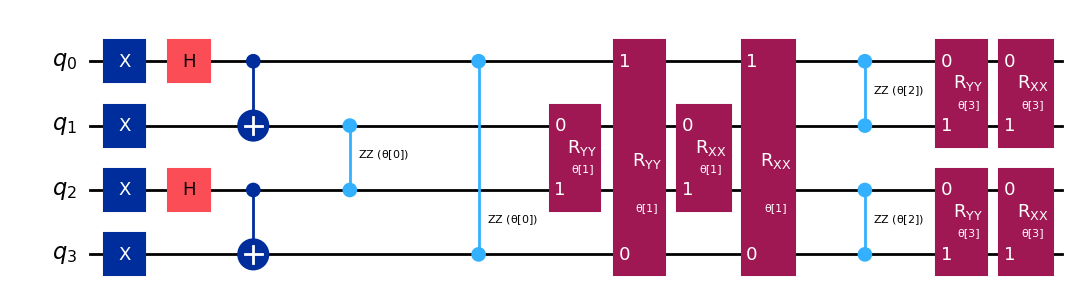

In [3]:

# 示例：4 比特，1 层，示例权重
num_q, layer = 4, 1
qc, _ = circuit_QAOA_XXZ(num_q, layer)
qc.draw(output='mpl')


In [4]:

# # 示例：4 比特，1 层，示例权重
# num_q, layer = 4, 2
# num_p = layer * 4

# weights = np.random.uniform(0, 2*np.pi, size=num_p)

# expval = expectation_loss_grad(num_q,
#                                layer,
#                                weights,
#                                circuit=circuit_QAOA_XXZ,
#                                obs=xxz_op,
#                                )
# print(expval)

# expval = expectation_loss_grad(num_q,
#                                layer,
#                                weights,
#                                circuit=circuit_QAOA_XXZ,
#                                obs=xxz_op,
#                                shots=1024,
#                                )
# print(expval)

# expval, grad  = expectation_loss_grad(num_q,
#                                layer,
#                                weights,
#                                circuit=circuit_QAOA_XXZ,
#                                output="both",
#                                obs=xxz_op,
#                                )
# print(expval)
# print(grad)

# expval, grad  = expectation_loss_grad(num_q,
#                                layer,
#                                weights,
#                                circuit=circuit_QAOA_XXZ,
#                                output="both",
#                                obs=xxz_op,
#                                shots=1024,
#                                )
# print(expval)
# print(grad)

# expval, grad  = expectation_loss_grad(num_q,
#                                layer,
#                                weights,
#                                circuit=circuit_QAOA_XXZ,
#                                output="both",
#                                obs=xxz_op,
#                                shots=1024,
#                                spec_param= 0,
#                                )
# print(expval)
# print(grad)

# expval, grad  = expectation_loss_grad(num_q,
#                                layer,
#                                weights,
#                                circuit=circuit_QAOA_XXZ,
#                                output="both",
#                                obs=xxz_op,
#                                shots=1024,
#                                spec_param= [0,2],
#                                )
# print(expval)
# print(grad)

# BP

In [ ]:
qubits = range(3, 21)

num_samples = 50
layer_factor = 2

In [ ]:
expval_means = []
expval_variances = []

for num_q in qubits:
    fun_vals = []
    layer = layer_factor * num_q
    num_p = layer * 4
    tfim_op = xxz_hamiltonian(num_q, Jz=0.5, bc='periodic')

    for i in range(num_samples):
        weights = np.random.uniform(0, 2*np.pi, size=num_p)
        expval = expectation_loss_grad(num_q, 
                                        layer, 
                                        weights, 
                                        circuit=circuit_QAOA_XXZ,
                                        obs=tfim_op)
        fun_vals.append(expval)

    expval_means.append(np.mean(fun_vals))
    expval_variances.append(np.var(fun_vals))

print(expval_means)
print(expval_variances)




[0.09006084497972824, 0.8083322490525241, 0.34854759702077553]
[1.6710270258386806, 7.486315449837674, 0.7347057875998614]


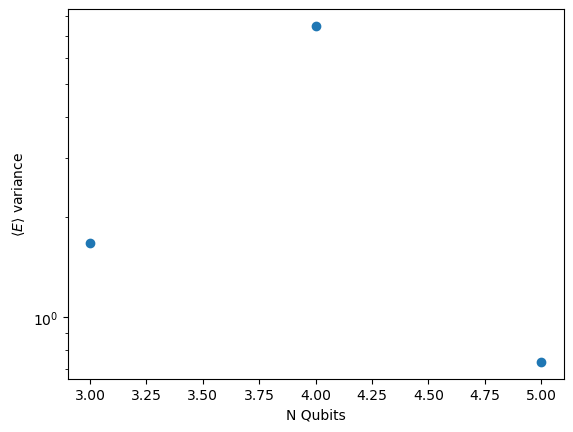

In [7]:
expval_variances = np.array(expval_variances)
qubits = np.array(qubits)

# Fit the semilog plot to a straight line
# p = np.polyfit(qubits, np.log(variances), 1)

# Plot the straight line fit to the semilog
plt.semilogy(qubits, expval_variances, "o")
# plt.semilogy(qubits, np.exp(p[0] * qubits + p[1]), "o-.", label="Slope {:3.2f}".format(p[0]))
plt.xlabel(r"N Qubits")
plt.ylabel(r"$\langle E\rangle$ variance")
# plt.legend()
plt.show()


In [ ]:
# grad_means = []
# grad_variances = []

# for num_q in qubits:
#     fun_vals = []
#     layer = layer_factor * num_q
#     num_p = layer * 4
#     tfim_op = xxz_hamiltonian(num_q, Jz=0.5, bc='periodic')

#     for i in range(num_samples):
#         weights = np.random.uniform(0, 2*np.pi, size=num_p)
#         _, grad = expectation_loss_grad(num_q, 
#                                         layer, 
#                                         weights, 
#                                         circuit=circuit_QAOA_XXZ,
#                                         obs=tfim_op,
#                                         output="both",
#                                         spec_param=[0])
#         fun_vals.append(grad)

#     grad_means.append(np.mean(fun_vals))
#     grad_variances.append(np.var(fun_vals))

# print(grad_means)
# print(grad_variances)




[0.1245510747657254, -1.8240424155001491, 0.10551942073080127]
[1.8671633851634808, 8.981389860887962, 1.0561359434946969]


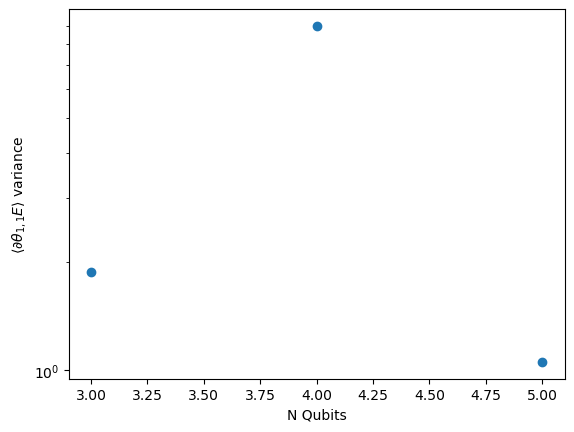

In [ ]:
# grad_variances = np.array(grad_variances)
# qubits = np.array(qubits)

# # Fit the semilog plot to a straight line
# # p = np.polyfit(qubits, np.log(variances), 1)

# # Plot the straight line fit to the semilog
# plt.semilogy(qubits, grad_variances, "o")
# # plt.semilogy(qubits, np.exp(p[0] * qubits + p[1]), "o-.", label="Slope {:3.2f}".format(p[0]))
# plt.xlabel(r"N Qubits")
# plt.ylabel(r"$\langle \partial \theta_{1, 1} E\rangle$ variance")
# # plt.legend()
# plt.show()